## Task 2
From given data predict the Predict Student Score of 9.25 hrs study.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('student_scores - student_scores.csv', sep=',')
df


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.shape

(25, 2)

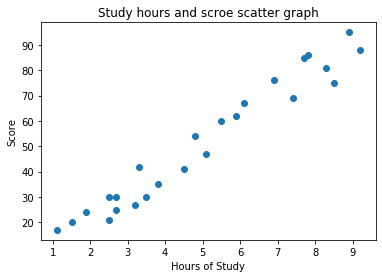

In [4]:
plt.scatter(df.Hours, df.Scores)
plt.xlabel('Hours of Study')
plt.ylabel('Score')
plt.title('Study hours and scroe scatter graph')
plt.show()

In [5]:
X = np.array(df.Hours)
y = np.array(df.Scores)
print (type(X))
print (type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Solution First Using fit a line using Python without any library
__Find a best fit line__

    ypred = mx + c
    m = slop
    c = intercept


In [6]:
def pred(m, X, c):
    return m*X + c
    

In [7]:
def error(m, c, X, y):
    ypred = m*X + c
    err = ypred - y
    return np.sum(err * err)  / len(X)

In [8]:
# Make some small change in m and c check the erro
def diffP(fn, idx, *args):
    
    delta = 0.000000000001
    y = fn(*args)
    args = list(args)
    args[idx] += delta
    y1 = fn(*args)
    
    return (y1 - y) / delta
    

## Gradient Discent 

In [9]:
def grad_fit(X, y):
    
    m = np.random.random() 
    c = np.random.random()
    learning_rate = 0.001
    for i in range(100):
        print ("Epoch ", i, ': Error:', error(m, c, X, y))
        dE_dm = diffP(error, 0, m, c, X, y)
        dE_dc = diffP(error, 1, m, c, X, y)
        
        m = m - learning_rate * dE_dm
        c = c - learning_rate * dE_dc
        
    return (m, c)

In [10]:
m, c = grad_fit(X, y)

Epoch  0 : Error: 3035.621950286757
Epoch  1 : Error: 2662.4930619649203
Epoch  2 : Error: 2336.0601527616277
Epoch  3 : Error: 2049.93542268968
Epoch  4 : Error: 1799.1280037648453
Epoch  5 : Error: 1579.2630445534603
Epoch  6 : Error: 1386.7303150998441
Epoch  7 : Error: 1218.3739874610997
Epoch  8 : Error: 1070.8071395691245
Epoch  9 : Error: 941.4037284903529
Epoch  10 : Error: 828.199391527515
Epoch  11 : Error: 729.0258681709104
Epoch  12 : Error: 642.1229698784533
Epoch  13 : Error: 566.0505280925036
Epoch  14 : Error: 499.4062891210278
Epoch  15 : Error: 441.0191377941253
Epoch  16 : Error: 389.84603195962586
Epoch  17 : Error: 345.04838832072824
Epoch  18 : Error: 305.8265455549645
Epoch  19 : Error: 271.4735299281164
Epoch  20 : Error: 241.36434968106062
Epoch  21 : Error: 214.99425837228466
Epoch  22 : Error: 191.903228922487
Epoch  23 : Error: 171.67010255861757
Epoch  24 : Error: 153.95245763251376
Epoch  25 : Error: 138.43239462965855
Epoch  26 : Error: 124.83881338152126

In [11]:
#9.811892619070575 2.2590012320254607
# 28.900686811284576
print (m, c)

9.82239380679338 2.115362615360149


c:\users\jit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


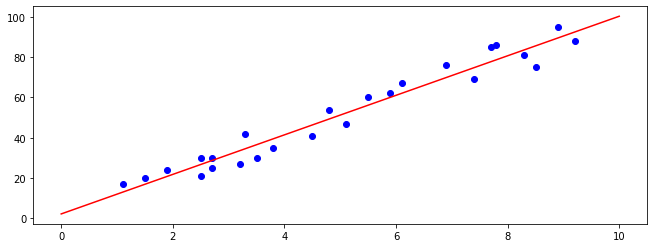

In [12]:
x1 = 0
x2 = 10

y1 = m*x1 + c
y2 = m*x2 + c

ycap = m*X + c
plt.figure(figsize=(11, 4))
plt.subplot()

plt.plot([x1, x2], [y1, y2], color = 'r')
plt.subplot()
plt.scatter(X, y, color='b')
plt.show()

In [13]:
pred(m, 9.25, c)

92.97250532819892

## SKLern Regression

In [14]:
from sklearn.linear_model import LinearRegression


In [15]:
lm = LinearRegression()
lm.fit(X.reshape(-1, 1), y)



LinearRegression()

In [16]:
ypred = lm.predict(X.reshape(-1, 1))
err = ypred - y
np.sum(err * err)  / len(X)

28.882730509245466

In [17]:
lm.coef_

array([9.77580339])

In [18]:
lm.intercept_

2.48367340537321

c:\users\jit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


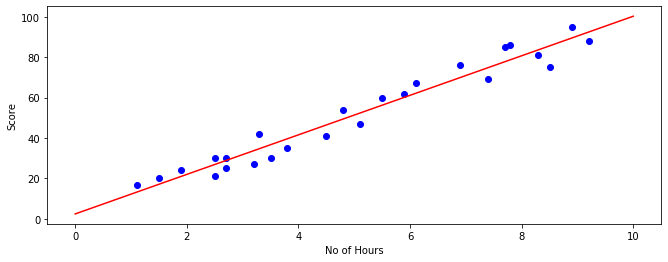

In [21]:
x1 = 0
x2 = 10

y1 = lm.coef_*x1 + lm.intercept_
y2 = lm.coef_*x2 + lm.intercept_

ycap = lm.coef_*X + lm.intercept_
plt.figure(figsize=(11, 4))
plt.subplot()

plt.plot([x1, x2], [y1, y2], color = 'r')
plt.subplot()
plt.xlabel('No of Hours')
plt.scatter(X, y, color='b')
plt.ylabel("Score")
plt.show()

In [22]:
lm.predict(np.array([9.25]).reshape(-1, 1))

array([92.90985477])

## Sklearn SGDRegressor

In [23]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor()
model.fit(X.reshape(-1, 1), y)

SGDRegressor()

In [24]:
model.coef_

array([10.05059943])

In [26]:

ypred = model.predict(X.reshape(-1, 1))
err = ypred - y
np.sum(err * err)  / len(X)

29.438213551991716

c:\users\jit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


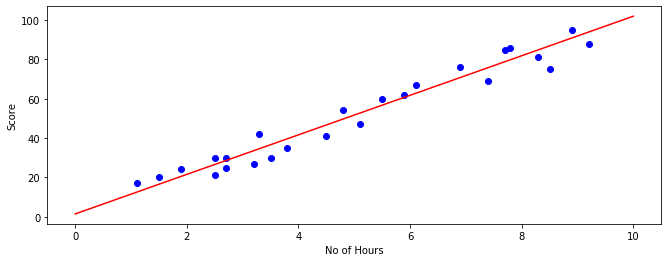

In [27]:
x1 = 0
x2 = 10

y1 = model.coef_*x1 + model.intercept_
y2 = model.coef_*x2 + model.intercept_

ycap = model.coef_*X + model.intercept_
plt.figure(figsize=(11, 4))
plt.subplot()

plt.plot([x1, x2], [y1, y2], color = 'r')
plt.subplot()
plt.xlabel('No of Hours')
plt.scatter(X, y, color='b')
plt.ylabel("Score")
plt.show()

In [28]:
model.predict(np.array([9.25]).reshape(-1, 1))

array([94.37983288])

## Result

In [29]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ['Model', 'MSE', 'Prediction 9.25']

x.add_row(['Gradient Descent', 28.91, 92.97])
x.add_row(['SKLearn Linear Regression', 28.88, 92.90])
x.add_row(['SGD Regressor', 29.43, 94.37])

print (x)

+---------------------------+-------+-----------------+
|           Model           |  MSE  | Prediction 9.25 |
+---------------------------+-------+-----------------+
|      Gradient Descent     | 28.91 |      92.97      |
| SKLearn Linear Regression | 28.88 |       92.9      |
|       SGD Regressor       | 29.43 |      94.37      |
+---------------------------+-------+-----------------+
